### Fashion MNIST image classification by using MLP 

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print('Versions: Tensorflow{0}, Keras{1}'.format(tf.__version__, tf.keras.__version__))

Versions: Tensorflow2.11.0, Keras2.11.0


### Dataset: Fashion MNIST 
- Image: 28x28 pixels, black and white image
- 10 classes = {'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'}
- Training : Testing = 60,000 : 10,000

In [35]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print('Train: {0}:{1}'.format(len(X_train), len(X_test)))
print('Shape of Training set:', X_train.shape)
print('Data type: {0} = (0 to 255)'.format(X_train.dtype))

Train: 60000:10000
Shape of Training set: (60000, 28, 28)
Data type: uint8 = (0 to 255)


####  $\circ$ 처음 5개 sample {특징(영상), 라벨}

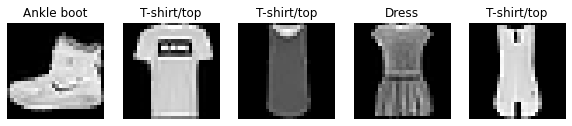

첫번째 데이터 라벨: 9→Ankle boot
첫번째 데이터 특징(영상):
X_train[0]=
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0 

In [36]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10,5))
for c in range(5):
    plt.subplot(1,5, c+1)
    plt.imshow(X_train[c], cmap="gray")
    plt.title(class_names[y_train[c]])
    plt.axis('off')
plt.show()

print('첫번째 데이터 라벨: {0}→{1}'.format(y_train[0], class_names[y_train[0]]))
print('첫번째 데이터 특징(영상):\nX_train[0]=\n', X_train[0])

### Data processing
- 60,000장 중에 일부만 사용. {학습용: 45,000장, 검증용: 15,000장}
- [0, 255]값을 가진 화소값을 [0, 1]사이의 범위로 정규화(normalization)을 수행함.

In [37]:
X_train = X_train / 255.
X_test = X_test / 255.
print('학습 : 검증 : 테스트 = {0} : {1} : {2}'.format(int(len(X_train)*0.75), int(len(X_train)*0.25),len(X_test)))

학습 : 검증 : 테스트 = 45000 : 15000 : 10000


### <span style="color:red">  Step 1:</span> Build a model 
- Input nodes: 784 (=28*28)
- Dense (1st hidden) layer: 300 nodes,  활성함수: ReLU
- Dense (2nd hidden) layer: 100 nodes,  활성함수: ReLU
- Dense (output) layer: 10 nodes,  활성함수: softmax

In [38]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.layers

#### - Note: 동일한 다른 구현:
```python
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")])
```

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


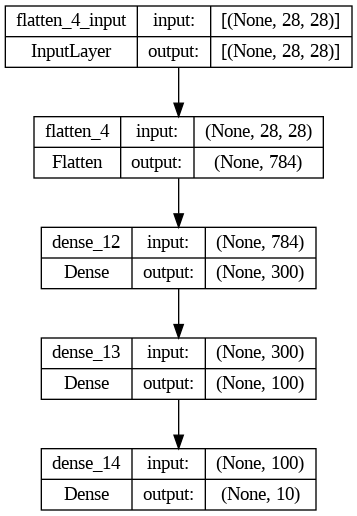

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [41]:
hidden1 = model.layers[1]
print("1",hidden1.name)
print("2",model.get_layer(hidden1.name) is hidden1)

weights, biases = hidden1.get_weights()
print('3: weights shape: {0}, biases shape: {1}'.format(weights.shape, biases.shape))
print('4: weights = ', weights[:2, :3])
print('5: biases = ', biases[:5])

1 dense_12
2 True
3: weights shape: (784, 300), biases shape: (300,)
4: weights =  [[-0.06879359  0.04237416  0.04732639]
 [ 0.01920061  0.05801861  0.03655366]]
5: biases =  [0. 0. 0. 0. 0.]


### <span style="color:red"> Step 2: </span> Set up training 

In [42]:
print(y_train[0:2])

[9 0]


In [43]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

#### - Note: 동일한 다른 구현:
```python
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])
```

### <span style="color:red"> Step 3: </span>Training model

In [44]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose = 2, validation_split=0.25)

Epoch 1/30
1407/1407 - 5s - loss: 0.7308 - accuracy: 0.7608 - val_loss: 0.5298 - val_accuracy: 0.8165 - 5s/epoch - 4ms/step
Epoch 2/30
1407/1407 - 5s - loss: 0.4990 - accuracy: 0.8274 - val_loss: 0.5353 - val_accuracy: 0.8012 - 5s/epoch - 3ms/step
Epoch 3/30
1407/1407 - 5s - loss: 0.4522 - accuracy: 0.8409 - val_loss: 0.4590 - val_accuracy: 0.8389 - 5s/epoch - 3ms/step
Epoch 4/30
1407/1407 - 5s - loss: 0.4240 - accuracy: 0.8505 - val_loss: 0.5127 - val_accuracy: 0.8131 - 5s/epoch - 4ms/step
Epoch 5/30
1407/1407 - 4s - loss: 0.4047 - accuracy: 0.8574 - val_loss: 0.4301 - val_accuracy: 0.8451 - 4s/epoch - 3ms/step
Epoch 6/30
1407/1407 - 5s - loss: 0.3867 - accuracy: 0.8643 - val_loss: 0.4917 - val_accuracy: 0.8206 - 5s/epoch - 4ms/step
Epoch 7/30
1407/1407 - 5s - loss: 0.3739 - accuracy: 0.8678 - val_loss: 0.4094 - val_accuracy: 0.8541 - 5s/epoch - 4ms/step
Epoch 8/30
1407/1407 - 4s - loss: 0.3631 - accuracy: 0.8712 - val_loss: 0.3864 - val_accuracy: 0.8639 - 4s/epoch - 3ms/step
Epoch 9/

In [46]:
print("loss: ", history.history['loss'])
print("accuracy", history.history['accuracy'])

loss:  [0.7307595610618591, 0.49903786182403564, 0.4521881639957428, 0.42400693893432617, 0.40470337867736816, 0.3867201507091522, 0.3738802373409271, 0.363129585981369, 0.3524487614631653, 0.34209373593330383, 0.33351513743400574, 0.32580867409706116, 0.31848570704460144, 0.3116488754749298, 0.30598685145378113, 0.29882192611694336, 0.2927960753440857, 0.28780055046081543, 0.2820812463760376, 0.2777653634548187, 0.27254608273506165, 0.2678302228450775, 0.26262739300727844, 0.2587141692638397, 0.2551228404045105, 0.25060737133026123, 0.24697576463222504, 0.24280059337615967, 0.23855049908161163, 0.2341974675655365]
accuracy [0.7608444690704346, 0.8274444341659546, 0.8409333229064941, 0.8504889011383057, 0.8574444651603699, 0.8642666935920715, 0.8678444623947144, 0.871222198009491, 0.8750888705253601, 0.8790666460990906, 0.8806222081184387, 0.8834888935089111, 0.8870221972465515, 0.8889999985694885, 0.8908222317695618, 0.8922666907310486, 0.8955110907554626, 0.8952000141143799, 0.897511

<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


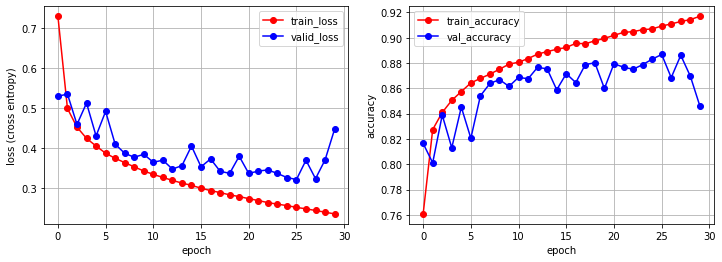

In [47]:
print(type(history.history))
print(history.history.keys())

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['loss'], 'ro-', label='train_loss')
plt.plot(history.epoch, history.history['val_loss'], 'bo-', label='valid_loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss (cross entropy)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.epoch, history.history['accuracy'], 'ro-', label='train_accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], 'bo-', label='val_accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [48]:
print('history params = ', history.params)
print('history epoch = ', history.epoch)
print('history keys = ',history.history.keys())

history params =  {'verbose': 2, 'epochs': 30, 'steps': 1407}
history epoch =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
history keys =  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


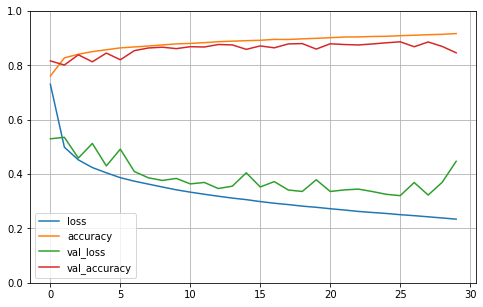

In [49]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### <span style="color:red"> Step 4: </span> Model Evaluation by using Test dataset

In [51]:
model.evaluate(X_train, y_train, verbose=0)

[0.37405210733413696, 0.8659999966621399]

### <span style="color:red"> Step 5: </span> Prediction 
- Test dataset의 처음 3개의 sample들에 대해 예측 수행

In [54]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print('(1) 예측 확률:\n', y_proba.round(2), '\n')

y_pred = np.argmax(y_proba, axis=1)
print('(2) 예측 결과:\n', np.array(class_names)[y_pred])

1/1 [==============================] - 0s 123ms/step
(1) 예측 확률:
 [[0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.99]
 [0.   0.   0.71 0.   0.29 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]] 

(2) 예측 결과:
 ['Ankle boot' 'Pullover' 'Trouser']


- Test dataset의 처음 3개의 sample들의 정답값

정답값(GT):  [9 2 1]['Ankle boot' 'Pullover' 'Trouser']


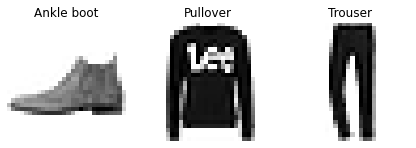

In [55]:
y_new = y_test[:3]
print('정답값(GT): ', y_new, end='')
print(np.array(class_names)[y_new])

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_new[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()